In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [6]:
df = pd.read_csv("data/emotion_dataset.csv")
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [9]:
df['Emotion'].value_counts()

Emotion
joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: count, dtype: int64

<Axes: xlabel='Emotion', ylabel='count'>

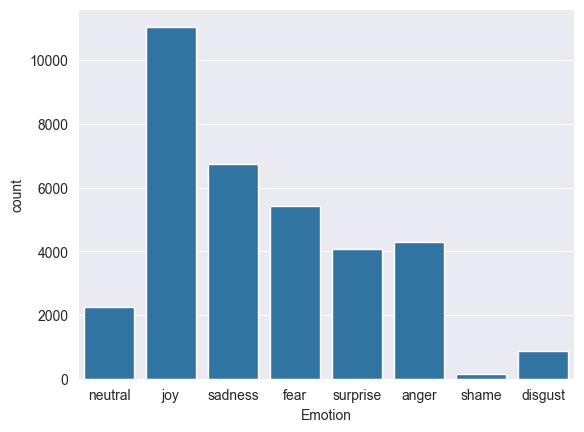

In [10]:
sns.countplot(x='Emotion',data=df)